# <u><center>*Resampling Datetime Data Core*</center>
* Authored By: Eric N. Valdez
* Date: 1/30/2024>

# <u>(Core1) Resampling Datetime Data:

For this assignment, you will be working with a modified version of [weather data from London from Kaggle.](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data)

The assignment is split into <u>2 parts</u>:

Part 1: Load the data and create a datetime index

Part 2: Answer 2 Questions using visualizations and the correct frequency data

## <u>Part 1) Load the data and make a datetime index.</u>
* Use the modified version of the data provided here:> * Share URL
    > * [ https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharin](https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit#gid=1198589591.csv)


* Raw URL:
> * [https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv](http://localhost:8888/edit/Data/london_weather_MODIFIED%20-%20london_weather_MODIFIED.csv)

### <u> You must first load the data and create a datetime index.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import missingno as miss
import numpy as np

import datetime as dt
import statsmodels.tsa.api as tsa

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [2]:
# Loading Data
data = 'Data/london_weather_MODIFIED - london_weather_MODIFIED.csv'
df = pd.read_csv(data)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,20201230,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


### 1. <u>Convert the date column to datetime dtype.

In [3]:
# Converting the date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

### 2. <u>Set the date column as the index.

In [4]:
# Inspecting the new Index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [5]:
# Checking the Dataframes .index
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

### 3. <u>Filter out only the required data:

* Keep only data from the year 2000 or later.

* Keep only the following features:
    * precipitation
    * mean_temp
    * min_temp
    * max_temp
    * snow_depth

In [6]:
# Filtration and viewing only first 5 rows
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00


### 4. <u> Impute any missing values.
* Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!
    

In [7]:
# Looking at missing data
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [8]:
# Interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [9]:
# Rechecking the missing data
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [10]:
# Filling precipitation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [11]:
# Rechecking the missing data
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## <u>Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

* For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
* Plot the feature that the question is asking about
  * If there is a specific time period, plot only that time period.

<u>Note:</u> you may want to make a temporary DataFrame that you will use to answer this question only.

In [14]:
rsdf = df.copy()
rsdf.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00


### Q1: <u>What month had the most precipitation between 2000 through 2010?

* <u>NOTE</u>: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled, like the screenshot below:


<img src = 'Data/1668548418__example-issue.png'>

* To get around this issue, first, create your fig and ax using plt.subplots()
    * 

Now you may use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().

<Axes: xlabel='date'>

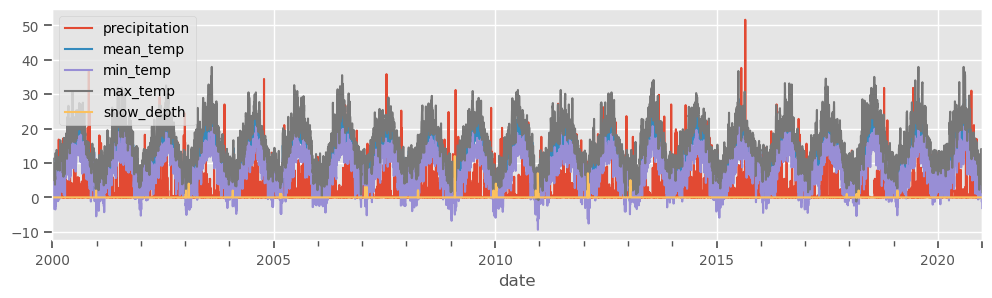

In [13]:
fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)

## <u>Visualization Issue Workaround:

### Q1: Visualization Requirements

* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3)
      * 
With the title "Precipitation for 2000-200"1       *
With a ylabel of "Ines"or ticks.

* Customize the major xaxis ticks to:
    * Have major xaxis ticks every 1 year.
    * Use 4-digit years for the labels
    * Rotate the major ticks' labels 90 degrees.

* Customize the minor xaxis ticks to:
    * Have minor xaxis ticks every 3 months
    * Do not label the minor ticks.

In [24]:
#Creating graph plots
temp_cols = ['mean_temp','min_temp','max_temp']
plot_df = rsdf.loc['2000': '2010',temp_cols]
plot_df

,mean_temp,min_temp,max_temp
date,,,
2000-01-01,7.00,4.90,10.80
2000-01-02,7.90,5.00,11.50
2000-01-03,9.40,7.20,9.50
2000-01-04,7.00,4.40,11.00
2000-01-05,6.40,1.90,10.80
...,...,...,...
2010-12-27,0.20,-4.60,8.00
2010-12-28,5.30,2.50,9.50
2010-12-29,6.80,4.10,7.70


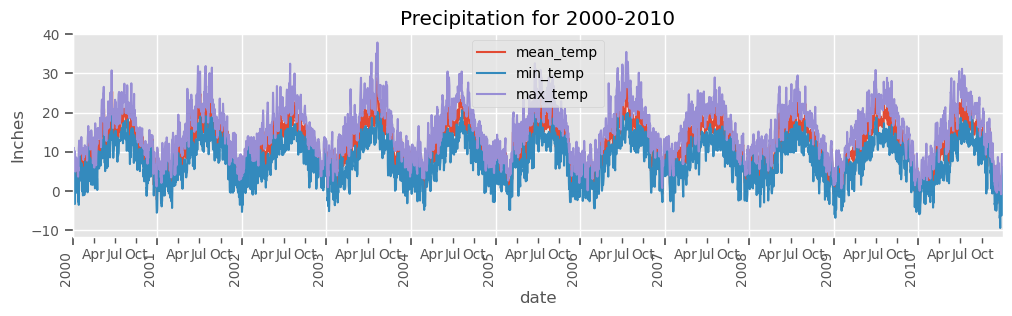

In [25]:
# Plot the data
ax = plot_df.plot(figsize=(12,3))
ax.set(title='Precipitation for 2000-2010', ylabel='Inches')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

### Q2: Which year between 2000-2020 had the coolest average temperature?

* Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
    * 
Plot the feature and time period that corresponds to the questino
*
Make sure to meet the "Visualization Requirements" bow
* !
Determine the year and value for the lowest meae
* 
* p.
Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

### Q3: Visualization Requirements
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3)
        * With the title "Average Temperature"
        * With a ylabel of "Degress".

* Customize the major xaxis ticks to:
    * Have major xaxis ticks every 5 years.
    * Use 4-digit years for the labels
    * Rotate the major ticks' labels 90 degrees.

* Customize the minor xaxis ticks to:
    * Have minor xaxis ticks every 1 year
    * Do not label the minor ticks.